Importing the Dependencies

Many people were denied access to the proper medication because they lacked insurance, which contributed to the unforeseen economic disaster that the epidemic has brought upon us all and the unprepared condition of unknown. This machine learning (ML) predicting model aids in knowing it well in advance so that users can make appropriate plans and set aside money for a significant rainy day. Finding the right algorithm for it was the challenging part. We were able to identify a workable algorithm and put this model into practise after conducting extensive research and working as a team. We hope that by doing this, the user will understand the value of health insurance and begin saving.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [59]:
# loading the data from csv file to a Pandas DataFrame
insurance_data = pd.read_csv('/content/insurance.csv')

In [60]:
# first 5 rows of the dataframe
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
# number of rows and columns
insurance_data.shape

(1338, 7)

In [62]:
# getting some informations about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [63]:
# checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [64]:
# statistical Measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


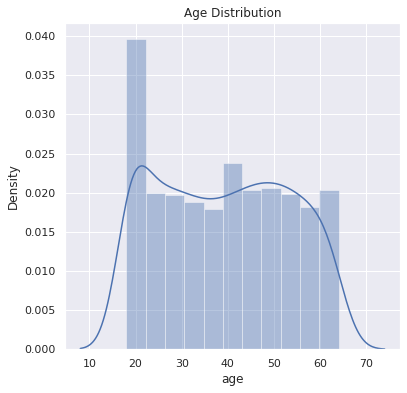

In [65]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

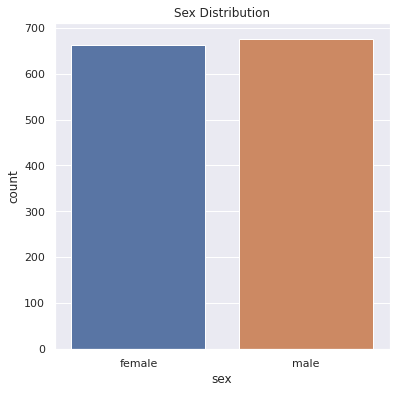

In [67]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_data['sex'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


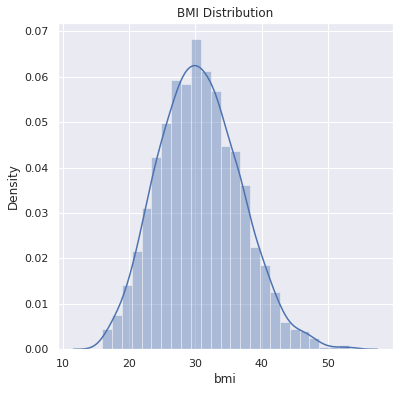

In [66]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

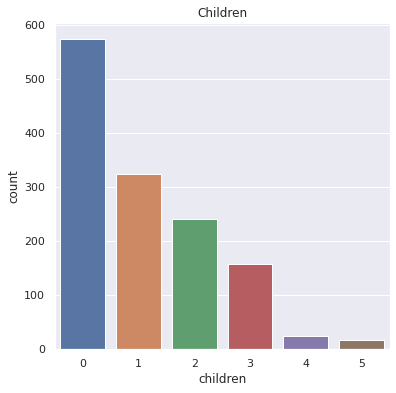

In [68]:
# children  column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('Children')
plt.show()

In [69]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

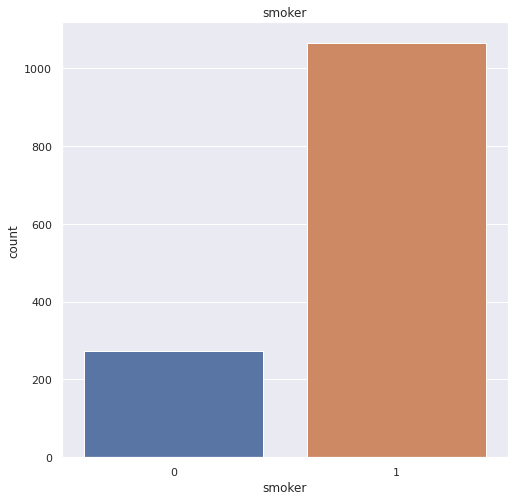

In [85]:
# smoker column
plt.figure(figsize=(8,8))
sns.countplot(x='smoker', data=insurance_data)
plt.title('smoker')
plt.show()

In [71]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

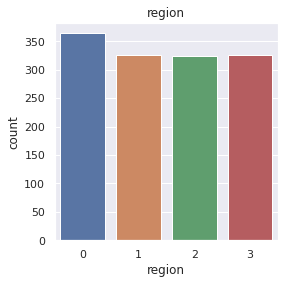

In [84]:
# region column
plt.figure(figsize=(4,4))
sns.countplot(x='region', data=insurance_data)
plt.title('region')
plt.show()

In [74]:
insurance_data['region'].value_counts()

0    364
1    325
3    325
2    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


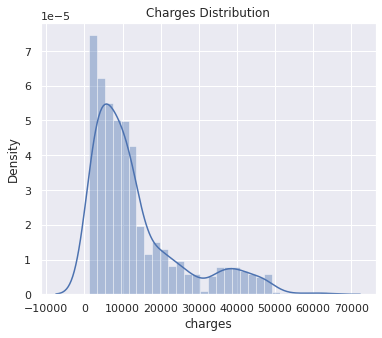

In [83]:

plt.figure(figsize=(6,5))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

Encoding the categorical features

In [82]:

insurance_data.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 
insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

Splitting the Features and Target

In [76]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

In [ ]:
print(X)

In [ ]:
print(Y)

Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

Model Training

Linear Regression

In [77]:

regres = LinearRegression()

In [78]:
regres.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [79]:

training_data_prediction =regres.predict(X_train)

In [ ]:

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

In [80]:

test_data_prediction =regres.predict(X_test)

In [ ]:

r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

Building a Predictive System

In [81]:
a = int(input('Enter age: '))
b = input('Enter gender: ')
c = float(input('Enter bmi: '))
d = int(input('Enter children: '))
e = input('Enter smoker : ')
f = input('Enter region: ')

if b == 'male':
  b = 0
else:
  b = 1

if e == 'yes':
  e = 0
else:
 e = 1
 
 
 
if f =='southeast':
   f = 0
elif f== 'southwest':
  f=1
elif f== 'northeast':
  f=2
else :
  f=3  



input_data = (a,b,c,d,e,f)

input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regres.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

Enter age: 31
Enter gender: female
Enter bmi: 21.47
Enter children: 0
Enter smoker : no
Enter region: southwest
[2560.44299718]
The insurance cost is USD  2560.4429971819554


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
